In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


**Read Dataset**

In [2]:
data = pd.read_csv('../input/zomato-eda/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Reading last five rows

In [3]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


Info of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.drop(['url','address','menu_item','phone','reviews_list'],axis=1,inplace=True)

In [6]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
data.rename(columns={'name':'restaurants name','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'price(for two people)'},inplace=True)

In [8]:
data.head(1)

,restaurants name,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [9]:
data.tail()

,restaurants name,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


In [10]:
data.dropna(inplace = True)

In [11]:
data.groupby('restaurants name').count().head()

,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
restaurants name,,,,,,,,,,,
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3,3
1131 Bar + Kitchen,6,6,6,6,6,6,6,6,6,6,6


In [12]:
data['restaurants name']=data['restaurants name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [13]:
data.groupby('restaurants name').count().head()

,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
restaurants name,,,,,,,,,,,
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3,3
1131 Bar + Kitchen,6,6,6,6,6,6,6,6,6,6,6


In [14]:
data.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
data.online_order.value_counts()

Yes    16448
No      6958
Name: online_order, dtype: int64

In [16]:
data.book_table.unique()
data.book_table.value_counts()

No     17264
Yes     6142
Name: book_table, dtype: int64

In [17]:
data.book_table.unique()
data.book_table.value_counts()

No     17264
Yes     6142
Name: book_table, dtype: int64

In [18]:
data['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
def rate(value):
    if(value =='NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
data['rating'] = data['rating'].apply(rate)
data['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurants name       23406 non-null  object 
 1   online_order           23406 non-null  object 
 2   book_table             23406 non-null  object 
 3   rating                 23259 non-null  float64
 4   votes                  23406 non-null  int64  
 5   location               23406 non-null  object 
 6   rest_type              23406 non-null  object 
 7   dish_liked             23406 non-null  object 
 8   food_type              23406 non-null  object 
 9   price(for two people)  23406 non-null  object 
 10  type                   23406 non-null  object 
 11  city                   23406 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


In [21]:
data['votes'].isnull().value_counts()

False    23406
Name: votes, dtype: int64

In [22]:
data['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [23]:
data['votes'].isnull().value_counts()

False    23406
Name: votes, dtype: int64

In [24]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Quick Bites, Sweet Shop', 'Takeaway',
       'Microbrewery, Pub', 'Club', 'Fine Dining', 'Baker

In [25]:
data['dish_liked'].unique()


array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [26]:
data['dish_liked'].isnull().value_counts()

False    23406
Name: dish_liked, dtype: int64

In [27]:
data['food_type'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

In [28]:
data['food_type'].isnull().value_counts()

False    23406
Name: food_type, dtype: int64

In [29]:
data['price(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [30]:
def comma(value):
    value = str(value)
    if ',' in  value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
data['price(for two people)'] = data['price(for two people)'].apply(comma)


In [31]:
data['price(for two people)'].head()


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: price(for two people), dtype: float64

In [32]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [33]:
data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [34]:
data.duplicated().value_counts() 

False    23364
True        42
dtype: int64

In [35]:
data.drop_duplicates(keep='last',inplace=True)
data.reset_index(drop=True,inplace=True)

In [36]:
data.duplicated().value_counts()

False    23364
dtype: int64

In [37]:
data.head()

,restaurants name,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23364 entries, 0 to 23363
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurants name       23364 non-null  object 
 1   online_order           23364 non-null  object 
 2   book_table             23364 non-null  object 
 3   rating                 23218 non-null  float64
 4   votes                  23364 non-null  int64  
 5   location               23364 non-null  object 
 6   rest_type              23364 non-null  object 
 7   dish_liked             23364 non-null  object 
 8   food_type              23364 non-null  object 
 9   price(for two people)  23364 non-null  float64
 10  type                   23364 non-null  object 
 11  city                   23364 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data.head()

,restaurants name,online_order,book_table,rating,votes,location,rest_type,dish_liked,food_type,price(for two people),type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


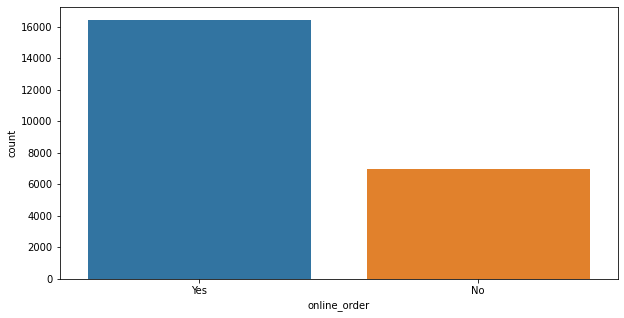

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=data) # countplot gives us count of the values
plt.show()

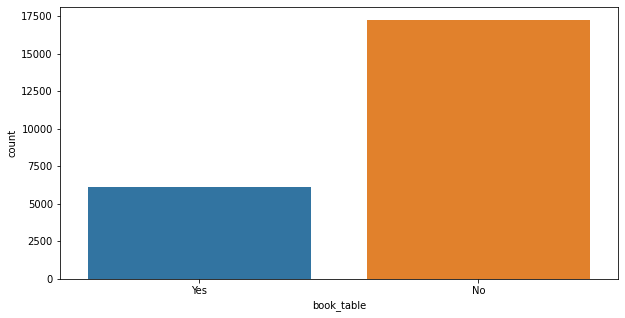

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='book_table',data=data) 
plt.show()

<Figure size 1152x720 with 0 Axes>

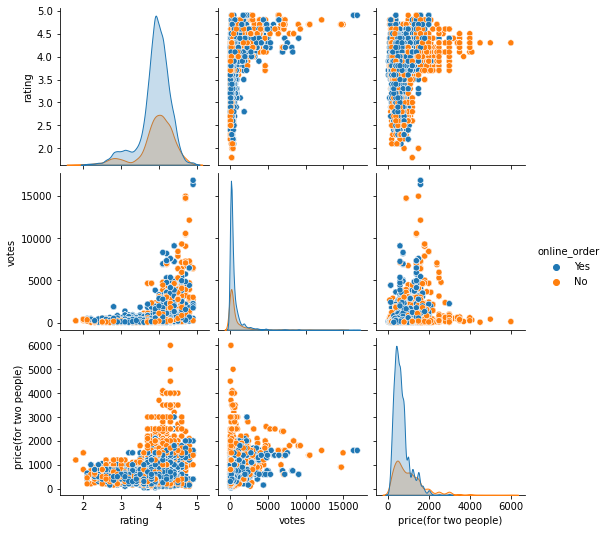

In [43]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data, hue='online_order')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


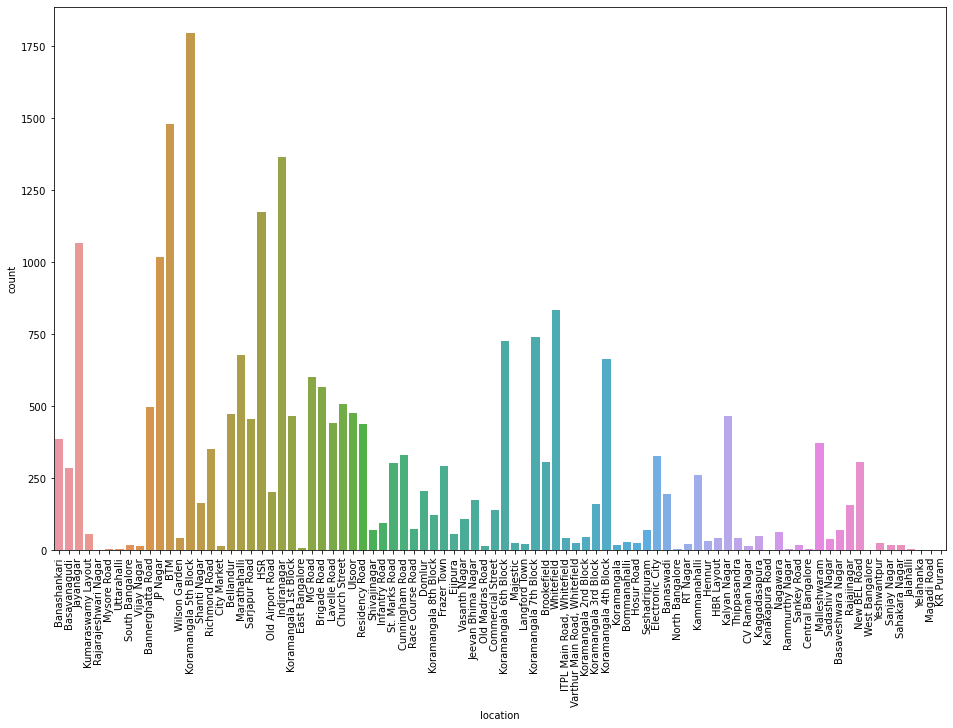

In [44]:
plt.figure(figsize=(16,10))
sns.countplot(data['location'])
plt.xticks(rotation='90')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

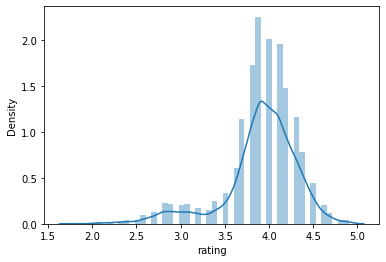

In [45]:
sns.distplot(data['rating'])

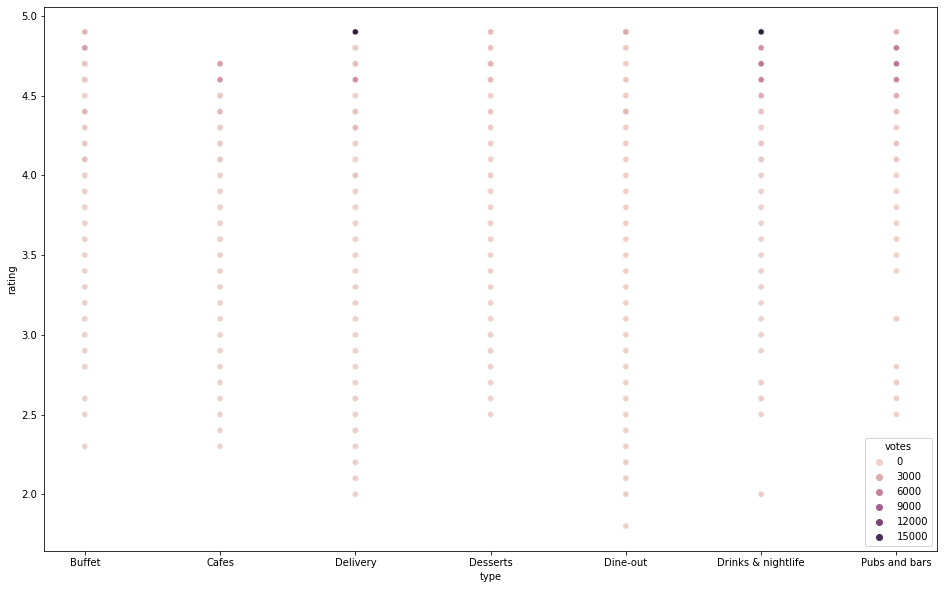

In [46]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='type',y='rating',hue='votes',data=data)
plt.show()

In [47]:
South_India=len([i for i in data['food_type'] if 'South India' in i])
North_India=len([i for i in data['food_type'] if 'North India' in i])
restaurant_count=[South_India,North_India] #creating list
Food_Type=['South India','North India']
df = pd.DataFrame({'Food_Type':Food_Type,'Restaurant_count':restaurant_count})#.set_index('Food_Type')# creating dataset of extracted data

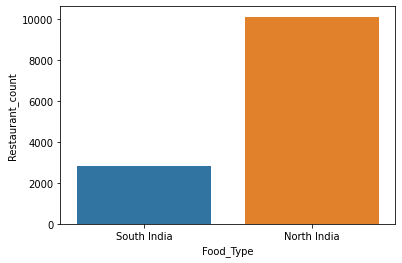

In [48]:
sns.barplot(x='Food_Type',y='Restaurant_count',data=df) 
plt.show()

In [49]:
df = data[['location','votes']]
df.drop_duplicates()
df1 = df.groupby(['location'])['votes'].sum()
df1 = df1.to_frame()
df1 = df1.sort_values('votes',ascending = False)
df1.head()

,votes
location,
Koramangala 5th Block,2203218
Indiranagar,1155387
Koramangala 4th Block,680907
Church Street,589803
JP Nagar,558680


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


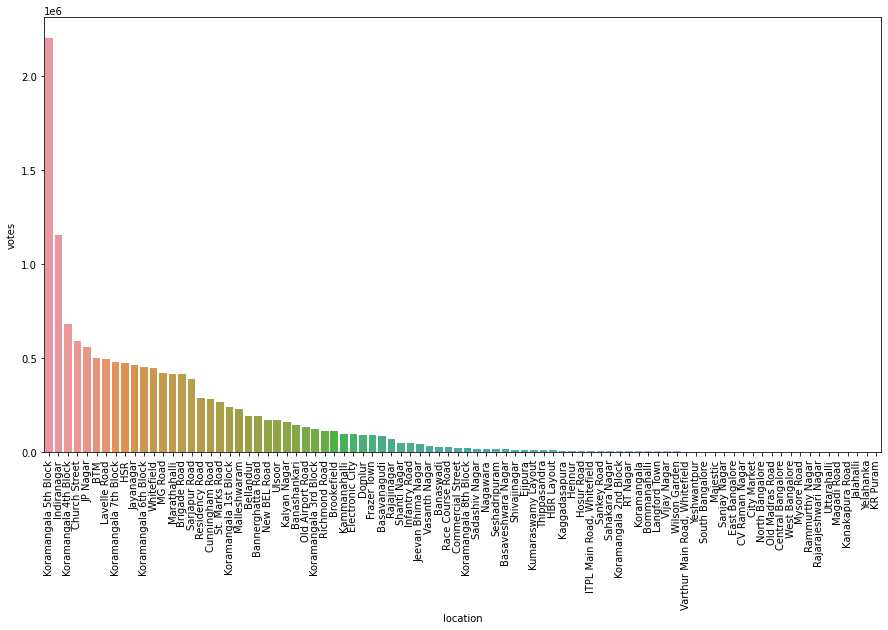

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(df1.index,df1['votes'])
plt.xticks(rotation='90')
plt.show()

(array([   0., 2500., 5000.]), [])

<Figure size 1080x576 with 0 Axes>

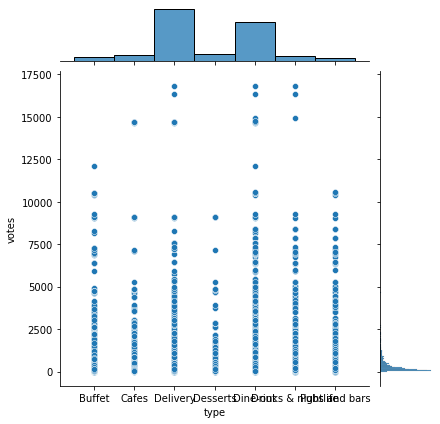

In [51]:
plt.figure(figsize=(15,8))
sns.jointplot(x='type', y='votes', data=data)
plt.xticks(rotation='90')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


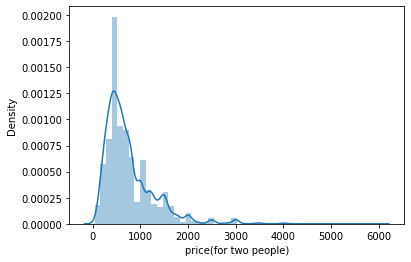

In [52]:
sns.distplot(data['price(for two people)'])
plt.show()

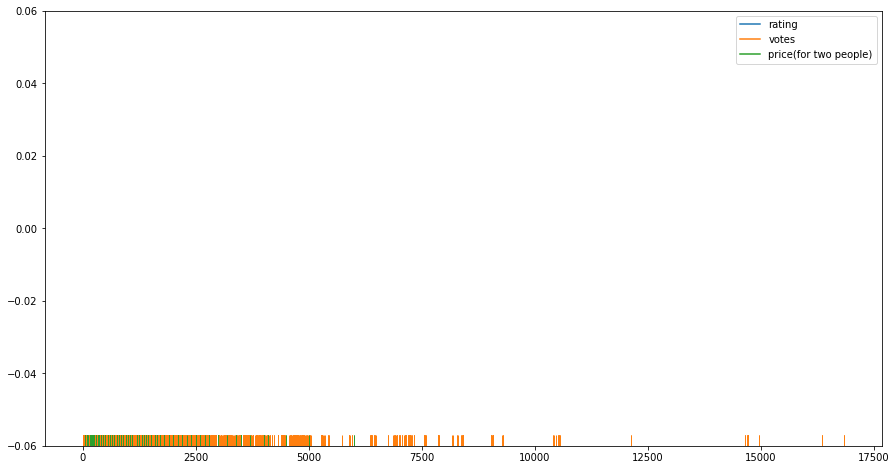

In [53]:
plt.figure(figsize=(15,8))
sns.rugplot(data=data)
plt.show()